In [ ]:
'''
Uploader: 聂延丰
Dataset used: Titanic Dataset
Package used: kagglehub, pandas, numpy, sklearn.model_selection, matplotlib.pyplot
Running Environment 
'''

In [2]:
import kagglehub

path = kagglehub.dataset_download("brendan45774/test-file")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\聂延丰\.cache\kagglehub\datasets\brendan45774\test-file\versions\6


In [1]:
import pandas as pd
titanic_dataset = pd.read_csv("./titanic/tested.csv")

titanic_dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [2]:
titanic = titanic_dataset

In [3]:
import numpy as np
def fill_dataset(titanic):
    titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())
    titanic['Cabin'] = titanic['Cabin'].fillna('Missing')
    titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])
    titanic['Fare'] = titanic['Fare'].fillna(titanic['Fare'].mode()[0])
    return titanic

In [4]:
titanic = fill_dataset(titanic)
len(titanic)

418

In [5]:
def normalize(x_train):
    Embarked = pd.get_dummies(x_train['Embarked'], prefix='Embarked')
    x_train = pd.concat([x_train, Embarked], axis=1)
    x_train.drop(columns='Embarked', inplace=True)
    
    x_train['Age'] = (x_train['Age'] - x_train['Age'].min()) / (x_train['Age'].max() - x_train['Age'].min())
    x_train['Fare'] = (x_train['Fare'] - x_train['Fare'].min()) / (x_train['Fare'].max() - x_train['Fare'].min())
    gender_class = {"female": 0, "male": 1}
    x_train['Sex'] = x_train['Sex'].map(gender_class)
    return x_train

In [6]:
id_train = titanic.loc[:, 'PassengerId']
x_train = titanic.drop(columns=['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'])
y_train = titanic.drop(columns=['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'])

for i in range(y_train.size):
    if y_train['Survived'][i] == 0:
        y_train.loc[i, 'Survived'] = -1

In [7]:
x_train = normalize(x_train)

In [42]:
# From here start to train
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.1)

In [43]:
Weight = np.random.rand(9, 1) * 10
Bias = np.random.rand(1) * 10
Weight, Bias

(array([[9.4796677 ],
        [0.27189034],
        [0.36349233],
        [0.47665532],
        [3.99734927],
        [7.98227743],
        [7.57165865],
        [5.25999244],
        [8.55454494]]),
 array([2.26194918]))

In [44]:
column_test = []
for i in range(418):
    flag = 1
    for key, value in X_test.items():
        if value.get(i) != None:
            flag = 0
    if flag == 0:
        column_test.append(i)

In [45]:
compute_acc(X_test, Y_test, Weight, Bias, len(X_test))

0.2619047619047619

In [46]:
def train(x_train, y_train, x_test, y_test, train_num, input_num, test_num, learning_rate=0.9):
    global Weight, Bias
    accs = []

    column = []
    for i in range(418):
        flag = 1
        for key, value in X_train.items():
            if value.get(i) != None:
                flag = 0
        if flag == 0:
            column.append(i)
    
    for rounds in range(train_num):
        for i in range(len(column)):
            sum = 0
            x = []
            for key, value in x_train.items():
                x.append(value[column[i]])
            # print(x)
            for j in range(Weight.size):
                sum = sum + Weight[j] * x[j]
            pred = np.sign((sum + Bias))
            if pred * y_train['Survived'][column[i]] <= 0.0:
                for j in range(Weight.size):
                    Weight[j] = Weight[j] + learning_rate * x[j] * y_train['Survived'][column[i]]
                Bias = Bias + learning_rate * y_train['Survived'][column[i]]
        acc = compute_acc(x_test, y_test, Weight, Bias, test_num)
        accs.append(acc)
    return accs

In [47]:
def compute_acc(x_test, y_test, weight, bias, test_num):
    pred = []
    for i in range(len(column_test)):
        sum = 0
        x = []
        for key, value in x_test.items():
            x.append(value[column_test[i]])
        for j in range(weight.size):
            sum += weight[j] * x[j]
        pred.append(np.sign(sum + Bias))
    cnt = 0
    for i in range(len(pred)):
        if pred[i] * y_test['Survived'][column_test[i]] > 0:
            cnt += 1
    return (cnt + 0.0) / test_num

In [48]:
accs = train(X_train, Y_train, X_test, Y_test, 100, len(X_train), len(X_test), learning_rate=0.01)


In [49]:
Weight, Bias, accs[len(accs) - 1]

(array([[-0.5703323 ],
        [-5.17810966],
        [-1.72590854],
        [-0.18334468],
        [ 0.07734927],
        [ 7.43404822],
        [ 5.75165865],
        [ 5.15999244],
        [ 5.67454494]]),
 array([-2.53805082]),
 0.9761904761904762)

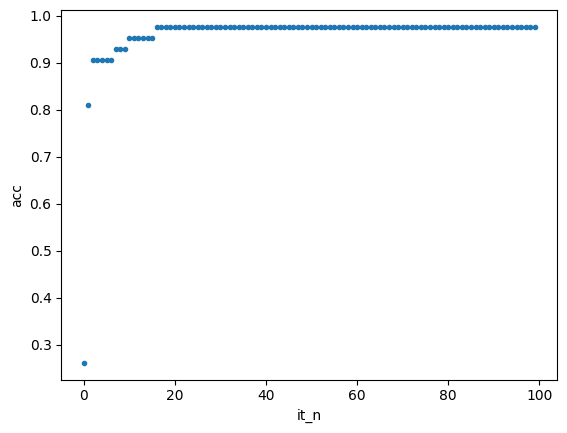

In [50]:
import matplotlib.pyplot as plt
plt.xlabel("it_n")
plt.ylabel("acc")
plt.scatter(range(len(accs)), accs, marker='.')
plt.show()